Učitavanje podataka iz dataset-a (podaci o segmentaciji iz .mat file-ova). <br>
<b>Računanje značajki:</b>
<ul>
    <li><b>m_RR</b> – srednja vrijednost RR intervala
    <li><b>sd_RR</b> – standardna devijacija RR intervala
    <li><b>m_IntS1</b> – srednja vrijednost S1 intervala
    <li><b>sd_IntS1</b> – standardna devijacija S1 intervala
    <li><b>m_IntS2</b> – srednja vrijednost S2 intervala
    <li><b>sd_IntS2</b> – standardna devijacija S2 intervala
    <li><b>m_IntSys</b> – srednja vrijednost sistoličkih intervala
    <li><b>sd_IntSys</b> – standardna devijacija sistoličkih intervala
    <li><b>m_IntDia</b> – srednja vrijednost dijastoličkih intervala
    <li><b>sd_IntDia</b> – standardna devijacija dijastoličkih intervala
    <li><b>m_Ratio_SysRR</b> – srednja vrijednost omjera sistoličkih i RR intervala za svaki otkucaj
    <li><b>sd_Ratio_SysRR</b> – standardna devijacija omjera sistoličkih i RR intervala
    <li><b>m_Ratio_DiaRR</b> – srednja vrijednost omjera dijastoličkih i RR intervala
    <li><b>sd_Ratio_DiaRR</b> – standardna devijacija omjera dijastoličkih i RR intervala
    <li><b>m_Ratio_SysDia</b> – srednja vrijednost omjera sistoličkih i dijastoličkih intervala
    <li><b>sd_Ratio_SysDia</b> – standardna devijacija omjera sistoličkih i dijastoličkih intervala
    <li><b>m_Amp_SysS1</b> – srednja vrijednost omjera srednje vrijednosti absolutne amplitude tijekom sistole u odnosu na onu tijekom S1
    <li><b>sd_Amp_SysS1</b> – standardna devijacija omjera srednje vrijednosti absolutne amplitude tijekom sistole u odnosu na onu tijekom S1
    <li><b>m_Amp_DiaS2</b> – srednja vrijednost omjera srednje vrijednosti absolutne amplitude tijekom dijastole u odnosu na onu tijekom S2
    <li><b>sd_Amp_DiaS2</b> – standardna devijacija omjera srednje vrijednosti absolutne amplitude tijekom dijastole u odnosu na onu tijekom S2
</ul>
Za pokretanje je potrebno imati dataset-ove A-F podijeljene u 6 foldera, te za učitavanje svakog dijela pripadajući REFERENCE_withSQI.csv file.

In [49]:
from PIL import Image
import os
import scipy.io as sio
import numpy as np
import csv
import itertools
import glob
#import librosa
import scipy.io.wavfile as wav
V=['a','b','c','d','e','f']
podaci=[]    #sadrzi podatke o segmentaciji svakog zapisa
labels=[]    #sadrzi oznake normal/abnormal i da li je noisy
wavs=[]         #sample_rate, data from wav file
m_RR=[]
sd_RR=[]
m_IntS1=[]
sd_IntS1=[]
m_IntS2=[]
sd_IntS2=[]
m_IntSys=[]
sd_IntSys=[]
m_IntDia=[]
sd_IntDia=[]
m_Ratio_SysRR=[]
sd_Ratio_SysRR=[]
m_Ratio_DiaRR=[]
sd_Ratio_DiaRR=[]
m_Ratio_SysDia=[]
sd_Ratio_SysDia=[]
nazivi=[]
m_Amp_SysS1=[]
sd_Amp_SysS1=[]
m_Amp_DiaS2=[]
sd_Amp_DiaS2=[]
###############################
for l in V:
    os.chdir('D:\\Updated files\\20160725_automated David Springer\'s annotations for training set\\training-'+l+'-Aut')
    for filename in os.listdir():
        podatak=sio.loadmat(filename)
        podatak=podatak['state_ans0']
        time=np.column_stack(podatak[:,0]).flatten()
        try:
            state=np.concatenate(np.column_stack(podatak[:,1]).flatten())
        except ValueError:                                                  #  ucitavanje da podaci budu normalne liste
            state=np.column_stack(podatak[:,1]).flatten()                   # a ne liste u listi u list u listi.....
            state=np.column_stack(state).flatten()
        podaci.append([time,state]) 
    os.chdir('D:\\Updated files\\training_set_signal_quality\\training-'+l)
    with open('REFERENCE_withSQI.csv','r') as f:
        reader=csv.reader(f)
        L=list(reader)
    nazivi.append([i[0] for i in L])
    L=[i[1:] for i in L]
    labels.append(L)
    os.chdir('D:\\Updated files\\training set\\training-'+l)
    for filename in glob.glob('*.wav'):
        wavs.append(wav.read(filename)[1])
wavs=np.abs(wavs)              #za racunanje amplitudnih znacajki
labels=list(itertools.chain.from_iterable(labels))   #spajanje lista
nazivi=list(itertools.chain.from_iterable(nazivi))
labels=np.array([[int(j) for j in i]for i in labels])






for i in range(len(podaci)):
        dat=podaci[i][0]                            
        dat1=np.append(dat,wavs[i].size)         #dodamo pom element koji oznacava ukupan broj signala u zapisu( da se izracuna trajanje zadnjeg stanja)
        state_dur=dat1[1:]-dat1[:-1]               #odredimo trajanje svakog stanja
        dia=state_dur[podaci[i][1]=='diastole']     #odvojimo trajanje pojedinih stanja
        sys=state_dur[podaci[i][1]=='systole']
        S1=state_dur[podaci[i][1]=='S1']
        S2=state_dur[podaci[i][1]=='S2']
        m_IntS1.append(np.mean(S1))
        sd_IntS1.append(np.std(S1))                  #racunamo potrebne veličine
        m_IntS2.append(np.mean(S2))
        sd_IntS2.append(np.std(S2))
        m_IntSys.append(np.mean(sys))
        sd_IntSys.append(np.std(sys))
        m_IntDia.append(np.mean(dia))
        sd_IntDia.append(np.std(dia))
        pom=dat[podaci[i][1]=='S1']       #zanima nas S1- pocetak srcanog ciklusa
        tr=pom[1:]-pom[:-1]             #trajanje svakog ciklusa
        m_RR.append(np.mean(tr))
        sd_RR.append(np.std(tr))
        #racunamo omjere izmedu trajanje sys intervala i RR intervala u svakom ciklusu
        f=np.where(podaci[i][1]=='S1')[0][0]
        l=np.where(podaci[i][1]=='S1')[0][-1]          #od interesa su nam puni ciklusi
        dat2=dat[f:l+1]
        state_dur=dat2[1:]-dat2[0:-1]
        pom1=podaci[i][1][f:l]
        sys1=state_dur[pom1=='systole']     
        m_Ratio_SysRR.append(np.mean(sys1/tr))
        sd_Ratio_SysRR.append(np.std(sys1/tr))
        #racunamo omjere izmedu trajanje dias intervala i RR intervala u svakom ciklusu
        dia1=state_dur[pom1=='diastole']
        if sum(dia1==0)>0:
            ind=np.where(dia1==0)
            dia1[ind]=1
        m_Ratio_DiaRR.append(np.mean(dia1/tr))             
        sd_Ratio_DiaRR.append(np.std(dia1/tr))
        m_Ratio_SysDia.append(np.mean(sys1/dia1))
        sd_Ratio_SysDia.append(np.std(sys1/dia1))
        dat=podaci[i][0][np.where(podaci[i][1]=='S1')[0][0]:np.where(podaci[i][1]=='S1')[0][-1]+1]     #pocnemo od S1
        datpol=podaci[i][1][np.where(podaci[i][1]=='S1')[0][0]:np.where(podaci[i][1]=='S1')[0][-1]+1]
        j=0
        syss1=[]
        dias2=[]
        while (j<len(dat)-1):
            s1=np.mean(wavs[i][dat[j]:dat[j+1]])
            sys=np.mean(wavs[i][dat[j+1]:dat[j+2]])
            dia=np.mean(wavs[i][dat[j+2]:dat[j+3]])
            s2=np.mean(wavs[i][dat[j+3]:dat[j+4]])
            if(s1==0):                
                s1=1/10
            j=j+4
            syss1.append(sys/s1)
            dias2.append(dia/s2)
        m_Amp_SysS1.append(np.mean(syss1))
        sd_Amp_SysS1.append(np.std(syss1))
        m_Amp_DiaS2.append(np.mean(dias2))
        sd_Amp_DiaS2.append(np.std(dias2))
        
            

features=np.column_stack([m_RR,sd_RR,m_IntS1,sd_IntS1,m_IntS2,sd_IntS2,m_IntSys,sd_IntSys,m_IntDia,sd_IntDia,m_Ratio_SysRR,sd_Ratio_SysRR,m_Ratio_DiaRR,sd_Ratio_DiaRR,m_Ratio_SysDia,sd_Ratio_SysDia,m_Amp_SysS1,sd_Amp_SysS1,m_Amp_DiaS2,sd_Amp_DiaS2, labels[:,0]])
print(features)

[[ 1.95000000e+03  6.88799277e+01  2.60540541e+02 ...  3.37760859e+00
   7.74529272e-01  1.00000000e+00]
 [ 1.53846154e+03  8.96013525e+01  2.77037037e+02 ...  2.34978359e+00
   7.25578006e-01  1.00000000e+00]
 [ 2.43000000e+03  8.26639785e+01  2.75200000e+02 ...  4.55348697e+00
   7.71142836e-01  1.00000000e+00]
 ...
 [ 2.88200000e+03  8.52994724e+01  2.89523810e+02 ...  3.32035753e+00
   1.32701234e+00 -1.00000000e+00]
 [ 2.09290323e+03  1.50829824e+02  2.57500000e+02 ...  6.02479902e+00
   4.27729380e+00 -1.00000000e+00]
 [ 2.00266667e+03  1.61965703e+02  2.74838710e+02 ...  5.94666667e+00
   2.66004731e+00 -1.00000000e+00]]


In [2]:
print(features[0])

[1.95000000e+03 6.88799277e+01 2.60540541e+02 2.39307499e+01
 2.14444444e+02 1.92129072e+01 4.70621622e+02 4.85560982e+01
 9.88054054e+02 8.58666301e+01 2.45412353e-01 1.60707127e-02
 5.10581268e-01 2.09703781e-02 4.82290315e-01 4.72403919e-02
 3.21829845e-01 9.79630322e-02 3.37760859e+00 7.74529272e-01
 1.00000000e+00]


In [4]:
len(features[0])

21

In [6]:
for i in range(len(labels)):
    print(labels[i])
    print(features[i])

[1 1]
[1.95000000e+03 6.88799277e+01 2.60540541e+02 2.39307499e+01
 2.14444444e+02 1.92129072e+01 4.70621622e+02 4.85560982e+01
 9.88054054e+02 8.58666301e+01 2.45412353e-01 1.60707127e-02
 5.10581268e-01 2.09703781e-02 4.82290315e-01 4.72403919e-02
 3.21829845e-01 9.79630322e-02 3.37760859e+00 7.74529272e-01
 1.00000000e+00]
[1 1]
[1.53846154e+03 8.96013525e+01 2.77037037e+02 3.42987760e+01
 2.34857143e+02 2.39548896e+01 2.10370370e+02 4.94024652e+01
 8.11851852e+02 7.98627080e+01 1.34342781e-01 2.75407507e-02
 5.30518454e-01 4.75004914e-02 2.59040280e-01 6.96423431e-02
 5.90093016e-01 1.73689961e-01 2.34978359e+00 7.25578006e-01
 1.00000000e+00]
[1 1]
[2.43000000e+03 8.26639785e+01 2.75200000e+02 2.06145580e+01
 2.89230769e+02 2.01767339e+01 3.53769231e+02 3.07562473e+01
 1.45542308e+03 2.68624441e+02 1.46301921e-01 1.44793560e-02
 6.22268691e-01 1.93319557e-02 2.35834191e-01 2.92580195e-02
 4.11946589e-01 7.26780562e-02 4.55348697e+00 7.71142836e-01
 1.00000000e+00]
[1 1]
[2.0035294

[-1  1]
[ 1.80000000e+03  2.00000000e+01  2.53333333e+02  1.88561808e+01
  2.26666667e+02  2.66666667e+01  3.86666667e+02  1.88561808e+01
  8.19900000e+02  2.26778504e+02  2.13913592e-01  1.09544290e-02
  5.16545894e-01  1.33632960e-02  4.14524045e-01  2.54651066e-02
  1.14964489e+00  3.32245871e-01  9.64789603e-01  1.93707350e-01
 -1.00000000e+00]
[-1  1]
[ 1.84000000e+03  1.04744587e+02  2.75000000e+02  3.70809924e+01
  1.95000000e+02  2.39791576e+01  3.50000000e+02  1.73205081e+01
  1.04877778e+03  6.98184595e+01  1.93070458e-01  1.21105680e-02
  5.61737860e-01  1.25331764e-02  3.44213406e-01  2.81800606e-02
  4.30433738e-01  6.82085413e-02  1.04973272e+00  3.79137121e-01
 -1.00000000e+00]
[-1  1]
[ 2.18666667e+03  4.98887652e+01  2.74285714e+02  1.39970842e+01
  2.22857143e+02  1.97948664e+01  3.71428571e+02  2.79941685e+01
  1.23987500e+03  2.29631464e+02  1.67528312e-01  9.64766413e-03
  6.03806074e-01  1.45917543e-02  2.77954174e-01  2.21010867e-02
  1.01677000e+00  4.61696148e-

[1 1]
[1.88000000e+03 3.46410162e+01 2.57777778e+02 1.98761598e+01
 2.09000000e+02 1.68391079e+01 4.00000000e+02 2.66666667e+01
 9.10888889e+02 3.09762793e+02 2.10010808e-01 1.02694362e-02
 5.42513074e-01 8.93909460e-03 3.87272080e-01 2.09014495e-02
 4.12799389e-01 7.67181799e-02 1.25043061e+00 2.88566983e-01
 1.00000000e+00]
[-1  1]
[ 1.91428571e+03  3.33197251e+01  2.55000000e+02  3.42782730e+01
  2.10000000e+02  2.64575131e+01  4.60000000e+02  2.00000000e+01
  9.55444444e+02  8.08140680e+01  2.41890753e-01  1.17213891e-02
  5.16403294e-01  1.91714168e-02  4.69479216e-01  3.49456964e-02
  8.87021881e-01  3.56281059e-01  1.22133017e+00  1.89014177e-01
 -1.00000000e+00]
[-1  1]
[ 1.67500000e+03  4.21307489e+01  2.57777778e+02  3.32591768e+01
  1.91800000e+02  5.36391648e+01  3.46666667e+02  2.66666667e+01
  8.64100000e+02  6.48327849e+01  2.02864098e-01  8.18802957e-03
  5.16050580e-01  2.13479561e-02  3.93608311e-01  1.94847866e-02
  4.17872410e-01  2.64653187e-01  1.26706811e+00  2.3

[ 2.00000000e+03  6.04743157e+01  2.40000000e+02  2.00000000e+01
  2.60000000e+02  2.82842712e+01  3.75000000e+02  4.44409721e+01
  1.01711111e+03  2.18546941e+02  1.88191495e-01  1.86180081e-02
  5.62963749e-01  1.06573604e-02  3.34858081e-01  3.81276267e-02
  1.26368628e+00  7.37857632e-01  1.37455865e+00  5.23242993e-01
 -1.00000000e+00]
[-1  1]
[ 2.03333333e+03  4.26874949e+01  2.80000000e+02  2.13808994e+01
  2.28571429e+02  1.80701581e+01  3.37142857e+02  1.97948664e+01
  9.19125000e+02  4.66629253e+02  1.67125414e-01  7.40683842e-03
  5.83558859e-01  1.63254237e-02  2.86718047e-01  1.67705711e-02
  1.84384364e-01  4.22889486e-02  5.64403930e+00  4.36125768e-01
 -1.00000000e+00]
[1 1]
[1.43040000e+03 1.45450473e+02 2.58461538e+02 3.18279398e+01
 2.24615385e+02 3.52169943e+01 2.93846154e+02 3.83382640e+01
 6.44481481e+02 8.38054937e+01 2.04810833e-01 1.77033607e-02
 4.57444561e-01 2.76938634e-02 4.50058546e-01 5.39598051e-02
 4.43373466e-01 4.97868514e-01 3.02411197e+00 1.26272834

[-1  1]
[ 1.45635294e+03  1.62990054e+02  2.33388889e+02  5.86639572e+01
  1.81176471e+02  3.66031746e+01  4.77647059e+02  5.03551401e+01
  5.60000000e+02  6.99579706e+01  3.28547316e-01  1.53723764e-02
  3.84722905e-01  2.53421034e-02  8.56760080e-01  5.86843334e-02
  2.29402482e-01  2.04451738e-01  2.57464509e+00  1.77187181e+00
 -1.00000000e+00]
[-1  1]
[ 1.72615385e+03  5.16703250e+01  2.68571429e+02  1.80701581e+01
  2.05714286e+02  1.39970842e+01  3.88571429e+02  1.80701581e+01
  7.99533333e+02  1.89670896e+02  2.24776108e-01  1.23031872e-02
  5.02270203e-01  1.79612677e-02  4.48769575e-01  3.87111730e-02
  3.17733480e-01  3.65281837e-02  2.74779890e+00  3.77407878e-01
 -1.00000000e+00]
[1 1]
[1.75818182e+03 7.18354410e+01 2.62608696e+02 2.84707922e+01
 2.15000000e+02 3.01385689e+01 4.13250000e+02 3.96392587e+01
 8.61541667e+02 6.31109995e+01 2.36915117e-01 1.90732430e-02
 4.90944850e-01 2.35432112e-02 4.84643370e-01 5.50804799e-02
 4.61340221e-01 9.53041175e-02 2.68216963e+00 7.

[ 1.69777778e+03  4.46661139e+01  2.67368421e+02  2.26743781e+01
  1.91111111e+02  1.66295884e+01  3.86368421e+02  1.83968262e+01
  8.46210526e+02  5.72672212e+01  2.27762243e-01  9.77201719e-03
  5.03690980e-01  1.47222971e-02  4.52795912e-01  2.75331585e-02
  2.10854296e-01  2.66751671e-02  2.94500107e+00  7.57433875e-01
 -1.00000000e+00]
[-1  1]
[ 1.81650000e+03  1.01627178e+02  2.45153846e+02  6.25728451e+01
  2.03333333e+02  1.10554160e+01  3.86666667e+02  1.88561808e+01
  9.83333333e+02  7.20339426e+01  2.13496482e-01  1.56277196e-02
  5.41327953e-01  2.50238123e-02  3.94974351e-01  3.05684817e-02
  5.75833400e-01  1.59066394e-01  1.13041825e+00  6.27737495e-02
 -1.00000000e+00]
[-1  1]
[ 1.81818182e+03  7.30900045e+01  2.53913043e+02  1.90512194e+01
  1.98181818e+02  8.33195581e+00  3.85869565e+02  3.55286833e+01
  9.59913043e+02  9.16713947e+01  2.16191129e-01  8.88295941e-03
  5.35537186e-01  1.43703522e-02  4.04243228e-01  2.43118115e-02
  5.73672239e-01  5.15097806e-02  1.08

[ 1.32500000e+03  2.66145324e+01  2.52800000e+02  1.86590461e+01
  1.93520000e+02  1.46345345e+01  3.05560000e+02  5.54790627e+01
  5.63200000e+02  1.93328736e+01  2.39042539e-01  8.49590217e-03
  4.25149937e-01  1.18385900e-02  5.62789988e-01  2.74486906e-02
  1.47388652e-01  3.06389046e-02  3.42027016e+00  1.09276970e+00
 -1.00000000e+00]
[1 1]
[1.42000000e+03 7.07106781e+01 2.72941176e+02 3.93722365e+01
 1.83529412e+02 1.96861183e+01 2.84705882e+02 3.03155264e+01
 6.51888889e+02 1.16150233e+02 1.97063399e-01 1.27109930e-02
 4.83678149e-01 2.82757346e-02 4.08299202e-01 2.89211163e-02
 3.33459071e-01 1.91836232e-01 1.16288902e+00 6.78172836e-01
 1.00000000e+00]
[-1  1]
[ 1.61263636e+03  5.72121613e+01  2.60782609e+02  5.67488414e+01
  2.09090909e+02  2.06505758e+01  3.55173913e+02  3.60828180e+01
  7.90909091e+02  3.98758404e+01  2.19887100e-01  2.18433671e-02
  4.90781854e-01  2.56618473e-02  4.48996113e-01  4.79484286e-02
  3.12444079e-01  6.35748993e-02  3.08035802e+00  9.60057113e

 -1.00000000e+00]
[-1  0]
[ 1.18098361e+03  1.53063845e+02  2.64983871e+02  4.88679894e+01
  2.27096774e+02  5.50772799e+01  1.81258065e+02  7.32280872e+01
  5.05806452e+02  6.70471280e+01  1.52043246e-01  4.60554374e-02
  4.29565920e-01  4.85044629e-02  3.67956361e-01  1.50959584e-01
  9.65154357e-01  9.49597905e-02  1.04060405e+00  9.91531542e-02
 -1.00000000e+00]
[-1  1]
[ 1.47840000e+03  3.66256741e+01  2.61538462e+02  1.99407406e+01
  1.91037037e+02  3.17833890e+01  3.16923077e+02  1.06587742e+01
  6.93444444e+02  5.60716033e+01  2.15441236e-01  5.76093520e-03
  4.74999654e-01  1.09162332e-02  4.53819229e-01  1.66764979e-02
  7.83302209e-02  1.66272357e-02  4.38086738e+00  5.99457148e-01
 -1.00000000e+00]
[-1  1]
[ 1.26193548e+03  4.04346829e+01  2.52500000e+02  2.33184476e+01
  2.08843750e+02  2.94035599e+01  2.56250000e+02  2.42061459e+01
  5.26187500e+02  9.57697230e+01  2.03531014e-01  1.88780969e-02
  4.29185691e-01  2.38751358e-02  4.75698495e-01  5.25569028e-02
  6.58621227

[-1  1]
[ 1.19052632e+03  3.10303220e+01  2.59871795e+02  2.77462675e+01
  1.97894737e+02  3.03625371e+01  1.89473684e+02  2.54379915e+01
  5.36358974e+02  4.79227408e+01  1.59060401e-01  2.05386547e-02
  4.55246361e-01  2.28848460e-02  3.50693166e-01  5.20030094e-02
  4.83849017e-01  8.16422197e-02  1.44949903e+00  2.01561075e-01
 -1.00000000e+00]
[-1  1]
[ 1.51200000e+03  2.83649683e+01  2.48194444e+02  1.74862159e+01
  2.06857143e+02  1.50753211e+01  4.04571429e+02  2.29711443e+01
  6.47722222e+02  3.39678043e+01  2.67533525e-01  1.34907326e-02
  4.30771054e-01  1.32930075e-02  6.21860411e-01  4.00795486e-02
  3.23311503e-01  3.61809958e-02  1.65693806e+00  1.57255344e-01
 -1.00000000e+00]
[-1  1]
[ 1.37702941e+03  3.46333614e+01  2.42869565e+02  3.08891956e+01
  2.00000000e+02  1.36201045e+01  3.64637681e+02  1.86950904e+01
  5.62913043e+02  5.93851929e+01  2.64957367e-01  1.43124744e-02
  4.13566179e-01  1.72377342e-02  6.42054514e-01  4.77628750e-02
  2.15799190e-01  7.32918440e-

[-1  1]
[ 1.08142857e+03  2.72179413e+01  2.31578947e+02  1.79462622e+01
  1.86666667e+02  2.63134502e+01  3.06120690e+02  4.59310118e+01
  3.50877193e+02  1.83800714e+01  2.90801718e-01  1.48566040e-02
  3.24304756e-01  1.51181123e-02  8.98908730e-01  6.55088753e-02
  4.47396910e-01  7.26876130e-02  1.49034681e+00  2.05496812e-01
 -1.00000000e+00]
[-1  1]
[ 1.18461538e+03  2.95128094e+01  2.28357143e+02  5.40576506e+01
  1.80000000e+02  2.00000000e+01  2.79857143e+02  5.15078754e-01
  4.80000000e+02  1.51185789e+01  2.36512079e-01  5.96157699e-03
  4.05183415e-01  8.02566898e-03  5.83960911e-01  1.92565092e-02
  1.24823569e-01  1.90605116e-02  5.01388289e+00  5.34292531e-01
 -1.00000000e+00]
[-1  1]
[ 1.99058824e+03  4.23529412e+01  2.64444444e+02  1.94999209e+01
  2.35294118e+02  1.28875896e+01  4.30944444e+02  1.65545302e+01
  1.04211111e+03  8.62824103e+01  2.16384133e-01  9.11674442e-03
  5.33025925e-01  1.16057588e-02  4.06315210e-01  2.23725583e-02
  1.30066216e-01  3.27454058e-

 1.00000000e+00]
[-1  1]
[ 1.79272727e+03  3.74386551e+01  2.43478261e+02  1.63144896e+01
  2.25000000e+02  1.93649167e+01  4.21583333e+02  1.98576532e+01
  8.85708333e+02  8.72513033e+01  2.34336146e-01  1.12561038e-02
  5.03952105e-01  1.14011532e-02  4.65459935e-01  2.84972806e-02
  2.15093557e-01  3.51174737e-02  6.50346286e+00  1.33157604e+00
 -1.00000000e+00]
[-1  1]
[ 1.11094340e+03  3.93467484e+01  2.37777778e+02  2.81968390e+01
  2.15555556e+02  2.92287699e+01  2.86666667e+02  2.27710017e+01
  3.67072727e+02  3.99394335e+01  2.57771070e-01  2.17551813e-02
  3.34239223e-01  2.30327098e-02  7.73899371e-01  7.52516154e-02
  3.99469778e-01  1.51505638e-01  2.85468656e+00  7.36986712e-01
 -1.00000000e+00]
[-1  1]
[ 1.86000000e+03  7.21110255e+01  2.50909091e+02  1.78144709e+01
  2.36363636e+02  1.14991915e+01  3.92727273e+02  1.54277843e+01
  8.72916667e+02  2.57483157e+02  2.11020124e-01  1.08030269e-02
  5.26391900e-01  1.74533402e-02  4.01764974e-01  3.07117645e-02
  1.45660056e

[ 1.20774194e+03  1.28683399e+02  2.67500000e+02  2.72717803e+01
  2.06060606e+02  3.13281163e+01  2.96909091e+02  6.25539106e+01
  4.22696970e+02  8.14566197e+01  2.52668637e-01  1.73482128e-02
  3.57599953e-01  1.84301210e-02  7.09047046e-01  6.78099440e-02
  2.34648202e-01  5.96694267e-02  2.17995281e+00  7.68521275e-01
 -1.00000000e+00]
[1 1]
[2.08888889e+03 4.53246179e+01 3.13684211e+02 2.67956254e+01
 2.00000000e+02 2.24780595e+01 4.02105263e+02 3.30197624e+01
 1.14780000e+03 1.05619884e+02 1.91519061e-01 1.55014423e-02
 5.62592998e-01 2.19707727e-02 3.41477627e-01 3.63195756e-02
 2.10156692e-01 5.24059502e-02 2.26119216e+00 4.42796646e-01
 1.00000000e+00]
[-1  1]
[ 1.42731707e+03  4.87414478e+01  2.45714286e+02  2.96922996e+01
  1.98581395e+02  2.67435996e+01  3.55302326e+02  5.29007561e+01
  6.21904762e+02  4.55254034e+01  2.54503044e-01  1.56650448e-02
  4.34436053e-01  2.40961745e-02  5.87925292e-01  5.34477144e-02
  6.20792032e-01  1.09742999e-01  1.10289555e+00  8.69789212e

In [8]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\dajo\Anaconda3\envs\py36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<h2>Stvaranje DataFrame-a</h2>
<p>
    Stvaranje data frame-a koji se sastoji od stupaca kojima su imena imena <b>20 značajki</b>, te je <b>21. stupac y vrijednost</b>, tj. pripadnost klasi te iznosi -1 za normalne zapise, a 1 za abnormalne.
</p>

In [16]:
data = pd.DataFrame(columns=['m_RR','sd_RR','m_IntS1','sd_IntS1','m_IntS2','sd_IntS2','m_IntSys','sd_IntSys','m_IntDia','sd_IntDia','m_Ratio_SysRR','sd_Ratio_SysRR','m_Ratio_DiaRR','sd_Ratio_DiaRR','m_Ratio_SysDia','sd_Ratio_SysDia','m_Amp_SysS1','sd_Amp_SysS1','m_Amp_DiaS2','sd_Amp_DiaS2', 'y'])

for i in range(len(labels)):
   data.loc[i] = features[i]

In [19]:
print(list(data.columns))

['m_RR', 'sd_RR', 'm_IntS1', 'sd_IntS1', 'm_IntS2', 'sd_IntS2', 'm_IntSys', 'sd_IntSys', 'm_IntDia', 'sd_IntDia', 'm_Ratio_SysRR', 'sd_Ratio_SysRR', 'm_Ratio_DiaRR', 'sd_Ratio_DiaRR', 'm_Ratio_SysDia', 'sd_Ratio_SysDia', 'm_Amp_SysS1', 'sd_Amp_SysS1', 'm_Amp_DiaS2', 'sd_Amp_DiaS2', 'y']


In [20]:
data.head()

,m_RR,sd_RR,m_IntS1,sd_IntS1,m_IntS2,sd_IntS2,m_IntSys,sd_IntSys,m_IntDia,sd_IntDia,...,sd_Ratio_SysRR,m_Ratio_DiaRR,sd_Ratio_DiaRR,m_Ratio_SysDia,sd_Ratio_SysDia,m_Amp_SysS1,sd_Amp_SysS1,m_Amp_DiaS2,sd_Amp_DiaS2,y
0,1950.000000,68.879928,260.540541,23.930750,214.444444,19.212907,470.621622,48.556098,988.054054,85.866630,...,0.016071,0.510581,0.020970,0.482290,0.047240,0.321830,0.097963,3.377609,0.774529,1.0
1,1538.461538,89.601352,277.037037,34.298776,234.857143,23.954890,210.370370,49.402465,811.851852,79.862708,...,0.027541,0.530518,0.047500,0.259040,0.069642,0.590093,0.173690,2.349784,0.725578,1.0
2,2430.000000,82.663978,275.200000,20.614558,289.230769,20.176734,353.769231,30.756247,1455.423077,268.624441,...,0.014479,0.622269,0.019332,0.235834,0.029258,0.411947,0.072678,4.553487,0.771143,1.0
3,2003.529412,117.770523,266.285714,21.258372,212.222222,20.697707,428.833333,20.217567,1077.611111,137.241733,...,0.013554,0.546200,0.023860,0.393819,0.039059,0.203815,0.059502,2.934240,0.671538,1.0
4,1352.307692,93.820930,249.056604,21.479622,197.692308,24.068443,251.566038,22.869201,651.283019,66.226705,...,0.015285,0.484085,0.017227,0.384992,0.040777,0.133840,0.036941,3.037472,0.684653,1.0


In [21]:
data['y'].value_counts()

-1.0    2488
 1.0     665
Name: y, dtype: int64

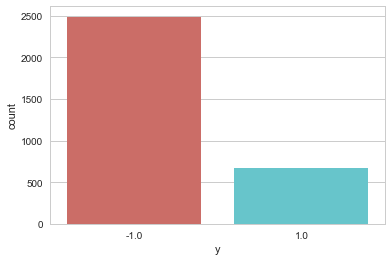

In [24]:
sns.countplot(x='y', data=data, palette='hls')
fig = plt.gcf()
plt.draw()
plt.show()
fig.savefig('D:\\count_plot.png', dpi=100)

<h2>Grupiranje dataset-a i srednje vrijednosti</h2>
<p>
    Grupiranje dataset-a po pripadnosti klasi, te za svaku klasa izračunata srednja vrijednost svake od značajki. Primjećuje se da su neke značajke poprilično slične (npr. m_Ratio_SysRR) dok je kod nekih vidljiva razlika (npr. sd_RR).
</p>

In [25]:
data.groupby('y').mean()

,m_RR,sd_RR,m_IntS1,sd_IntS1,m_IntS2,sd_IntS2,m_IntSys,sd_IntSys,m_IntDia,sd_IntDia,m_Ratio_SysRR,sd_Ratio_SysRR,m_Ratio_DiaRR,sd_Ratio_DiaRR,m_Ratio_SysDia,sd_Ratio_SysDia,m_Amp_SysS1,sd_Amp_SysS1,m_Amp_DiaS2,sd_Amp_DiaS2
y,,,,,,,,,,,,,,,,,,,,
-1.0,1669.163226,75.345247,258.550469,28.451309,208.555548,25.754572,366.906471,37.190014,806.210567,108.311047,0.222222,0.015776,0.481056,0.019533,0.482360,0.045670,1.181521,4.268058,3.205700,0.869203
1.0,1835.492573,99.438461,263.757845,34.355746,211.115599,31.828185,407.782032,48.135942,921.420924,128.099617,0.225323,0.018402,0.500102,0.023902,0.485515,0.054902,2.004726,7.977303,2.292191,0.781749


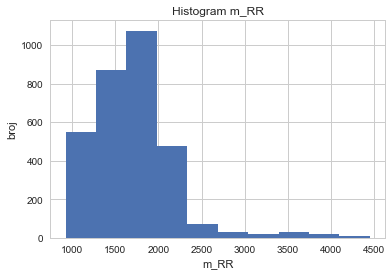

In [26]:
data.m_RR.hist()
plt.title('Histogram m_RR')
plt.xlabel('m_RR')
plt.ylabel('broj')
fig = plt.gcf()
plt.draw()
plt.show()
fig.savefig('D:\\histogram_m_RR.png', dpi=100)


<h1>Histogrami za m_Amp_DiaS2</h1>

<h3>Histogram za abnormalne zapise</h3>


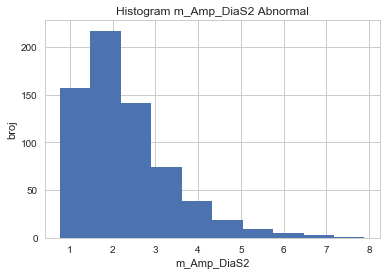

In [27]:
data_AB = data.loc[(data['y'] == 1)]
data_AB.m_Amp_DiaS2.hist()
plt.title('Histogram m_Amp_DiaS2 Abnormal')
plt.xlabel('m_Amp_DiaS2')
plt.ylabel('broj')
fig = plt.gcf()
plt.draw()
plt.show()
fig.savefig('D:\\histogram_m_Amp_DiaS2 Abnormal.png', dpi=100)

<h3>Histogram za abnormalne zapise</h3>

<p>
    U odnosu na normalne, vidljivo je da je raspon mnogo veći.
</p>

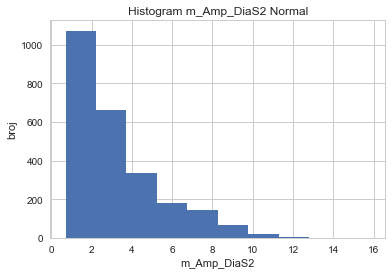

In [28]:
data_NO = data.loc[(data['y'] == -1)]
data_NO.m_Amp_DiaS2.hist()
plt.title('Histogram m_Amp_DiaS2 Normal')
plt.xlabel('m_Amp_DiaS2')
plt.ylabel('broj')
fig = plt.gcf()
plt.draw()
plt.show()
fig.savefig('D:\\histogram_m_Amp_DiaS2 Normal.png', dpi=100)

In [29]:
dataX = data.iloc[:, :20]
dataY = data.iloc[:, 20:]

In [30]:
dataX.head()

,m_RR,sd_RR,m_IntS1,sd_IntS1,m_IntS2,sd_IntS2,m_IntSys,sd_IntSys,m_IntDia,sd_IntDia,m_Ratio_SysRR,sd_Ratio_SysRR,m_Ratio_DiaRR,sd_Ratio_DiaRR,m_Ratio_SysDia,sd_Ratio_SysDia,m_Amp_SysS1,sd_Amp_SysS1,m_Amp_DiaS2,sd_Amp_DiaS2
0,1950.000000,68.879928,260.540541,23.930750,214.444444,19.212907,470.621622,48.556098,988.054054,85.866630,0.245412,0.016071,0.510581,0.020970,0.482290,0.047240,0.321830,0.097963,3.377609,0.774529
1,1538.461538,89.601352,277.037037,34.298776,234.857143,23.954890,210.370370,49.402465,811.851852,79.862708,0.134343,0.027541,0.530518,0.047500,0.259040,0.069642,0.590093,0.173690,2.349784,0.725578
2,2430.000000,82.663978,275.200000,20.614558,289.230769,20.176734,353.769231,30.756247,1455.423077,268.624441,0.146302,0.014479,0.622269,0.019332,0.235834,0.029258,0.411947,0.072678,4.553487,0.771143
3,2003.529412,117.770523,266.285714,21.258372,212.222222,20.697707,428.833333,20.217567,1077.611111,137.241733,0.214287,0.013554,0.546200,0.023860,0.393819,0.039059,0.203815,0.059502,2.934240,0.671538
4,1352.307692,93.820930,249.056604,21.479622,197.692308,24.068443,251.566038,22.869201,651.283019,66.226705,0.185831,0.015285,0.484085,0.017227,0.384992,0.040777,0.133840,0.036941,3.037472,0.684653


<p>
    Mijenjanje y vrijednosti za normalne zapise iz -1.0, priprema za logističku regresiju.
</p>

In [33]:
dataY = dataY.replace({'y' : { -1.0 : 0}})
dataY.head()

,y
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


<h2>Standardiziranje značajki</h2>

In [34]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_std = scaler.fit_transform(dataX)

logit_model=sm.Logit(dataY['y'],X_std)
result=logit_model.fit()
print(result.summary())

C:\Users\dajo\Anaconda3\envs\py36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.636199
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3153
Model:                          Logit   Df Residuals:                     3133
Method:                           MLE   Df Model:                           19
Date:                Sat, 30 Jun 2018   Pseudo R-squ.:                 -0.2350
Time:                        19:38:21   Log-Likelihood:                -2005.9
converged:                       True   LL-Null:                       -1624.3
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -4.9487      1.227     -4.033      0.000      -7.354      -2.544
x2            -0.1013      0.

<p>
    Podjela skupa podataka na 70-30%, zbog nebalansiranosti podataka pozivamo s parametrom class_weight='balanced'
</p>

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_std, data['y'], test_size=0.3, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [46]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.68


<h3>Matrica konfuzije</h3>
<p>
    Matrica konfuzije pomoću koje je lako izračunati da je recall 75.38% i osjetljivost 66.31% -> Macc = 70.85%
<p>

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[498 253]
 [ 48 147]]


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

       -1.0       0.91      0.66      0.77       751
        1.0       0.37      0.75      0.49       195

avg / total       0.80      0.68      0.71       946



In [39]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(class_weight='balanced')
scoring = 'recall'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.701


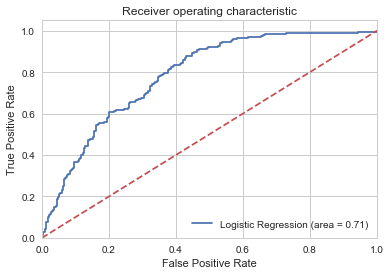

In [155]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<h1>Redukcija značajki</h1>
<p>
    Korištenje recursive feature elimination-a za redukciju značajki s 20 na 12.
</p>

In [50]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
logreg = LogisticRegression()
rfe = RFE(logreg, 12)
#estimator = SVR(kernel="linear")
#rfe = RFE(estimator, 12, step=1)
rfe = rfe.fit(dataX, data['y'] )
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False False  True  True False  True False  True  True
 False  True  True  True False False  True  True]
[1 6 1 5 2 1 1 4 1 3 1 1 8 1 1 1 7 9 1 1]


In [51]:
dataX_red = dataX.iloc[:, rfe.support_]
dataX_red.head()

,m_RR,m_IntS1,sd_IntS2,m_IntSys,m_IntDia,m_Ratio_SysRR,sd_Ratio_SysRR,sd_Ratio_DiaRR,m_Ratio_SysDia,sd_Ratio_SysDia,m_Amp_DiaS2,sd_Amp_DiaS2
0,1950.000000,260.540541,19.212907,470.621622,988.054054,0.245412,0.016071,0.020970,0.482290,0.047240,3.377609,0.774529
1,1538.461538,277.037037,23.954890,210.370370,811.851852,0.134343,0.027541,0.047500,0.259040,0.069642,2.349784,0.725578
2,2430.000000,275.200000,20.176734,353.769231,1455.423077,0.146302,0.014479,0.019332,0.235834,0.029258,4.553487,0.771143
3,2003.529412,266.285714,20.697707,428.833333,1077.611111,0.214287,0.013554,0.023860,0.393819,0.039059,2.934240,0.671538
4,1352.307692,249.056604,24.068443,251.566038,651.283019,0.185831,0.015285,0.017227,0.384992,0.040777,3.037472,0.684653


In [52]:
scaler = StandardScaler()
X_red_std = scaler.fit_transform(dataX_red)

logit_model=sm.Logit(dataY['y'],X_red_std)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.646579
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3153
Model:                          Logit   Df Residuals:                     3141
Method:                           MLE   Df Model:                           11
Date:                Sat, 30 Jun 2018   Pseudo R-squ.:                 -0.2551
Time:                        21:29:42   Log-Likelihood:                -2038.7
converged:                       True   LL-Null:                       -1624.3
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.4786      0.433     -3.415      0.001      -2.327      -0.630
x2             0.2475      0.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_red_std, data['y'], test_size=0.3, random_state=42)
logreg_red = LogisticRegression(class_weight='balanced')
logreg_red.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [54]:
y_pred2 = logreg_red.predict(X_test)
print('Accuracy of logistic regression classifier on test set for reduced features: {:.2f}'.format(logreg_red.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set for reduced features: 0.69


<h1>Matrica konfuzije za reducirane značajke</h1>
<p>
    U ovom slučaju recall je 76.41%, 67.24% što daje srednju vrijednost 71.83%, dakle rezultat za gotovo 1% bolji nego kod svih 20 značajki.
</p>

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred2)
print(confusion_matrix)

[[505 246]
 [ 46 149]]


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

       -1.0       0.91      0.66      0.77       751
        1.0       0.37      0.75      0.49       195

avg / total       0.80      0.68      0.71       946



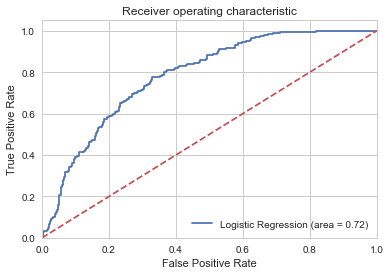

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg_red.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg_red.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()